In [1]:
import torch
import os
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from network import CharacterClassifier
from tqdm import tqdm
from training_data import HASY
from PIL import Image
from matplotlib import pyplot as plt

hasy_train = HASY('HASY')
hasy_test = HASY('HASY', train=False)

print("Train data length: {0}".format(len(hasy_train.data)))
print("Test data length: {0}".format(len(hasy_test.data)))
print("Img Shape: {0}".format(hasy_train.data[0].shape))
print("Number of Labels: {0}".format(hasy_train.no_labels))

100%|██████████| 16992/16992 [00:00<00:00, 29536.19it/s]


Train data length: 1958
Test data length: 224
Img Shape: torch.Size([3, 224, 224])
Number of Labels: 15


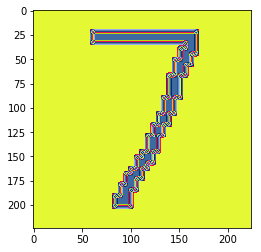

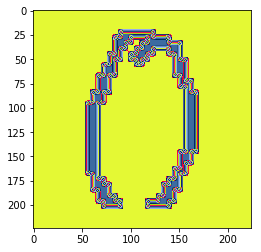

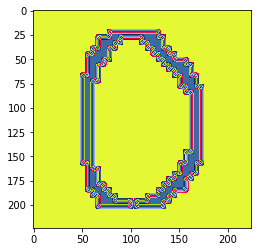

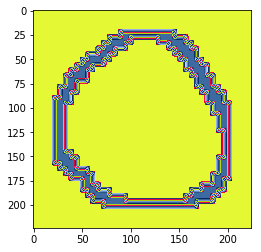

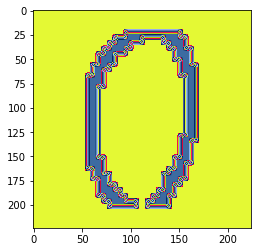

In [2]:
from torchvision import transforms
for i in range(5):
    test_img = transforms.ToPILImage()(hasy_train.data[i])
    plt.imshow(test_img, cmap='gray')
    plt.show()

In [ ]:
# Train with a pretrained model from PyTorch
from torchvision import models

pretrained = False
torch_model = models.densenet201(num_classes=15)
if pretrained:
    torch_model.load_state_dict(torch.load('pretrained-model-01.ckpt'))
epochs = 55
optimizer = torch.optim.Adam(torch_model.parameters(), lr=0.001, betas=(0.8, 0.925), weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

def calc_accuracy(model):
    accuracies = []
    for idx, [x_test, y_test] in enumerate(tqdm(test_loader)):
        test_pred = model(x_test)
        accuracy = 100 * torch.mean((torch.argmax(test_pred, dim=1) == y_test).float())
        accuracies.append(accuracy)
    print("Accuracy: {0}".format(np.mean(accuracies)))  

train_loader = DataLoader(hasy_train, batch_size=16, shuffle=True)
test_loader = DataLoader(hasy_test, batch_size=16, shuffle=False)

for epoch in range(epochs):
        print("Epoch {0}".format(epoch))
        for step, [x_train, y_train] in enumerate(tqdm(train_loader)):
            optimizer.zero_grad()
            train_pred = torch_model(x_train)
            loss = criterion(train_pred, y_train)
            loss.backward()
            optimizer.step()
            if step % 50 == 0:
                print('Loss: {}'.format(loss))
                calc_accuracy(torch_model)
torch.save(torch_model.state_dict(), 'pretrained-model-01.ckpt')


  0%|          | 0/123 [00:00<?, ?it/s]

Epoch 0




  0%|          | 0/14 [00:00<?, ?it/s]

Loss: 2.6990909576416016




  7%|▋         | 1/14 [00:07<01:33,  7.21s/it]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f7b04d3f400> (for post_execute):




ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
